In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

In [3]:
import sklearn as sk
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
#Issue here is Nowcasting, fills in the gaps between spme release, back to the now, nowcast now data. such as how many phones selled by 
#apple today, based on the high frequency released data . 
#data lagged, the published data(released data) is later than the actual data recorded, real time data. forcast release

# 0.) Clean the Apple Data to get a quarterly series of EPS.

In [31]:
y=pd.read_csv("AAPL_quarterly_financials.csv")

In [32]:
y.index=y.name

In [33]:
y

,name,ttm,09/30/2023,06/30/2023,03/31/2023,12/31/2022,09/30/2022,06/30/2022,03/31/2022,12/31/2021,...,12/31/1987,09/30/1987,06/30/1987,03/31/1987,12/31/1986,09/30/1986,06/30/1986,03/31/1986,12/31/1985,09/30/1985
name,,,,,,,,,,,,,,,,,,,,,
TotalRevenue,TotalRevenue,"383,285,000,000","89,498,000,000","81,797,000,000","94,836,000,000","117,154,000,000","90,146,000,000","82,959,000,000","97,278,000,000","123,945,000,000",...,"1,042,400,000","786,500,000","637,100,000","575,300,000","662,300,000","510,800,000","448,300,000","408,900,000","533,900,000","409,700,000"
\tOperatingRevenue,\tOperatingRevenue,"383,285,000,000","89,498,000,000","81,797,000,000","94,836,000,000","117,154,000,000","90,146,000,000","82,959,000,000","97,278,000,000","123,945,000,000",...,"1,042,400,000","786,500,000","637,100,000","575,300,000","662,300,000","510,800,000","448,300,000","408,900,000","533,900,000","409,700,000"
CostOfRevenue,CostOfRevenue,"214,137,000,000","49,071,000,000","45,384,000,000","52,860,000,000","66,822,000,000","52,051,000,000","47,074,000,000","54,719,000,000","69,702,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GrossProfit,GrossProfit,"169,148,000,000","40,427,000,000","36,413,000,000","41,976,000,000","50,332,000,000","38,095,000,000","35,885,000,000","42,559,000,000","54,243,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OperatingExpense,OperatingExpense,"54,847,000,000","13,458,000,000","13,415,000,000","13,658,000,000","14,316,000,000","13,201,000,000","12,809,000,000","12,580,000,000","12,755,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
\tSellingGeneralAndAdministration,\tSellingGeneralAndAdministration,"24,932,000,000","6,151,000,000","5,973,000,000","6,201,000,000","6,607,000,000","6,440,000,000","6,012,000,000","6,193,000,000","6,449,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
\tResearchAndDevelopment,\tResearchAndDevelopment,"29,915,000,000","7,307,000,000","7,442,000,000","7,457,000,000","7,709,000,000","6,761,000,000","6,797,000,000","6,387,000,000","6,306,000,000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
\tDepreciationAmortizationDepletionIncomeStatement,\tDepreciationAmortizationDepletionIncomeState...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
\t\tDepreciationAndAmortizationInIncomeStatement,\t\tDepreciationAndAmortizationInIncomeStatement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
y=pd.DataFrame(y.loc['BasicEPS',:]).iloc[2:,:]

In [35]:
y.head()

,BasicEPS
09/30/2023,1.47
06/30/2023,1.27
03/31/2023,1.53
12/31/2022,1.89
09/30/2022,1.29


In [36]:
y.index = pd.to_datetime(y.index) 

In [37]:
y.fillna(0.).sort_index()

,BasicEPS
1985-09-30,0.0
1985-12-31,0.004
1986-03-31,0.002
1986-06-30,0.002
1986-09-30,0.0
...,...
2022-09-30,1.29
2022-12-31,1.89
2023-03-31,1.53
2023-06-30,1.27


# 1.) Come up with 6 search terms you think could nowcast earnings. (Different than the ones I used) Add in 3 terms that that you think will not Nowcast earnings. Pull in the gtrends data. Clean it to have a quarterly average.

In [5]:
!pip install pytrends

In [6]:
from pytrends.request import TrendReq

In [76]:
# Create pytrends object
pytrends = TrendReq(hl='en-US', tz=360)

# Set up the keywords and the timeframe
keywords = ["iPhone", "Apple Layoffs","MacBook","iPad","Apple CEO","Apple Share Price","Recession","Chip Costs",
           "TaylorSwift Tickets","Hospital","Earth Flat"]  # Add your keywords here
start_date = '2004-01-01'
end_date = '2024-01-01'

# Create an empty DataFrame to store the results
df = pd.DataFrame()

# Iterate through keywords and fetch data
for keyword in keywords:
    pytrends.build_payload([keyword], cat=0, timeframe=f'{start_date} {end_date}', geo='', gprop='')
    interest_over_time_df = pytrends.interest_over_time()
    df[keyword] = interest_over_time_df[keyword]

In [77]:
X=df.resample("Q").mean()

In [78]:
len(X)

81

In [79]:
len(y)

73

In [80]:
#
temp=pd.concat([y,X],axis=1).dropna()
y=temp[["BasicEPS"]].copy()
X=temp.iloc[:,1:].copy()

# 2.) Normalize all the X data

In [81]:
#normalized
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [82]:
X_scaled=scaler.fit_transform(X)

# 3.) Run a Lasso with lambda of that reduced half of your variables. Plot a bar chart.

In [83]:
Lasso=Lasso(alpha=0.1)

In [84]:
Lasso.fit(X_scaled,y)

Lasso(alpha=0.1)

In [85]:
from sklearn.linear_model import Lasso

# Assume X_train and y_train are your training data and target values respectively
lasso_model = Lasso(alpha=.1)  # Create a Lasso instance; adjust the alpha parameter as needed
lasso_model.fit(X_scaled, y)  # Fit the model to your data

# Retrieve the coefficients
coefficients = lasso_model.coef_


In [86]:
coefficients

array([ 0.02070979,  0.        ,  0.        ,  0.        ,  0.01472642,
        0.31618297, -0.        , -0.        ,  0.00033192,  0.        ,
        0.        ])

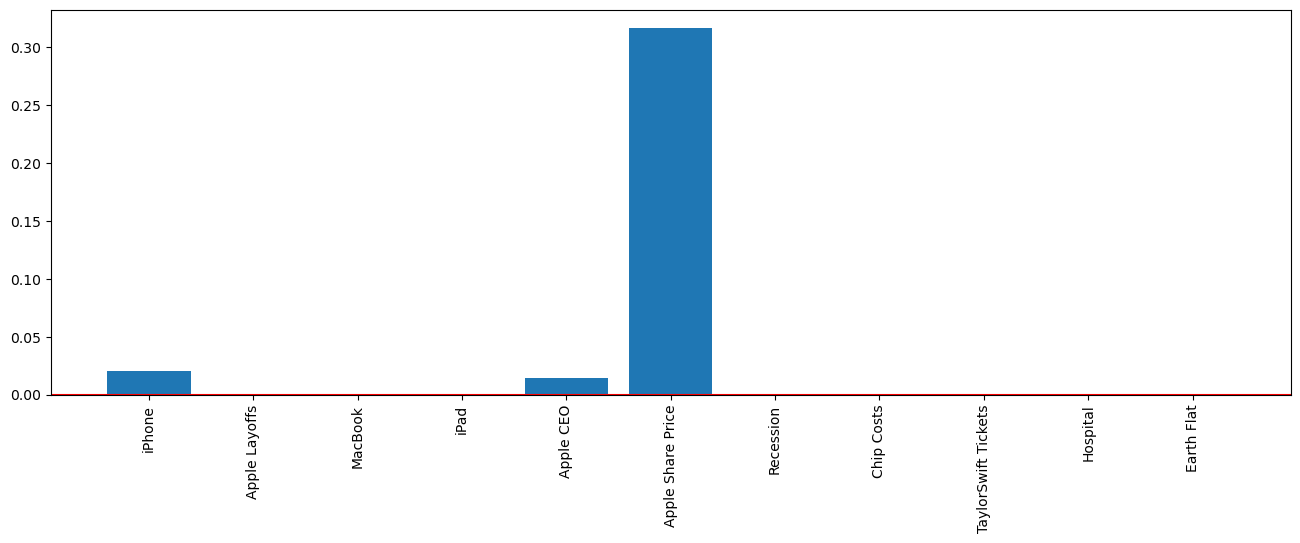

In [87]:
import matplotlib.pyplot as plt

# Assuming 'coefficients' is your array of Lasso coefficients
# and 'X' is your DataFrame from which these coefficients were derived

plt.figure(figsize=(16,5))
plt.bar(range(len(coefficients)), coefficients)
plt.axhline(0, color="red")

# Setting the tick labels
plt.xticks(range(len(coefficients)), X.columns, rotation='vertical')

plt.show()


In [88]:
X.columns

Index(['iPhone', 'Apple Layoffs', 'MacBook', 'iPad', 'Apple CEO',
       'Apple Share Price', 'Recession', 'Chip Costs', 'TaylorSwift Tickets',
       'Hospital', 'Earth Flat'],
      dtype='object')

# 5.) Do these coefficient magnitudes make sense?

# 6.) Run a for loop looking at 10 different Lambdas and plot the coefficient magnitude for each.

# 7.) Run a cross validation. What is your ideal lambda?